<a href="https://colab.research.google.com/github/sgsayani/Epilepsy-seizure/blob/main/Epilepsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from imblearn.combine import SMOTEENN
%matplotlib inline

from sklearn.preprocessing import StandardScaler#scalar
from sklearn.neighbors import KNeighborsClassifier#KNN
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.svm import SVC

from sklearn import tree #desicion tree

import os
import math
#import imblearn
#import logging
#import warnings
import statistics

import seaborn as sns
from collections import Counter
from sklearn import svm
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score , accuracy_score , precision_score, recall_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
#from numpy import genfromtxt


# SNS is A scatter plot displays data between two continuous data. 


# New section

In [ ]:
datas = pd.read_csv('Epileptic Seizure Recognition.csv')
print(datas)

          Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  y  
0       -15   -3

In [ ]:
datas.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
datas.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [ ]:
datas.shape

(11500, 180)

In [ ]:
datas.describe(include=object)

,Unnamed
count,11500
unique,11500
top,X21.V1.791
freq,1


In [ ]:
values_null = datas.isnull().sum()
values_null.to_numpy()#null value shows

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
data1= datas.copy()

In [ ]:
data1.drop(['Unnamed','y'],axis=1,inplace=True)


In [ ]:
data1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [ ]:
datas['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

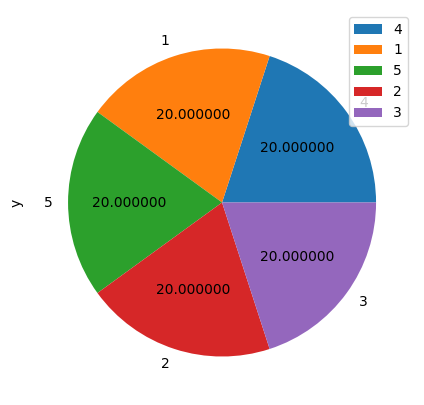

In [ ]:
#catagorical column in  ,it means all the categorical values
# in our dataset contains the equal amoung of balance.


values=datas['y'].value_counts()
plt.figure(figsize=(5,5))
values.plot(kind='pie',fontsize=10,autopct='%3f')#Autopct used to label the 
#wedges with their numeric value
plt.legend(loc="best")#specify location of legend default
#Legend() is a method in the matplotlib package that is being used to
# display a legend on graphs. The loc parameter in the legend()
# method can be utilized to indicate the legend's placement.
# Loc=”best” is the default value (upper left).
plt.show()

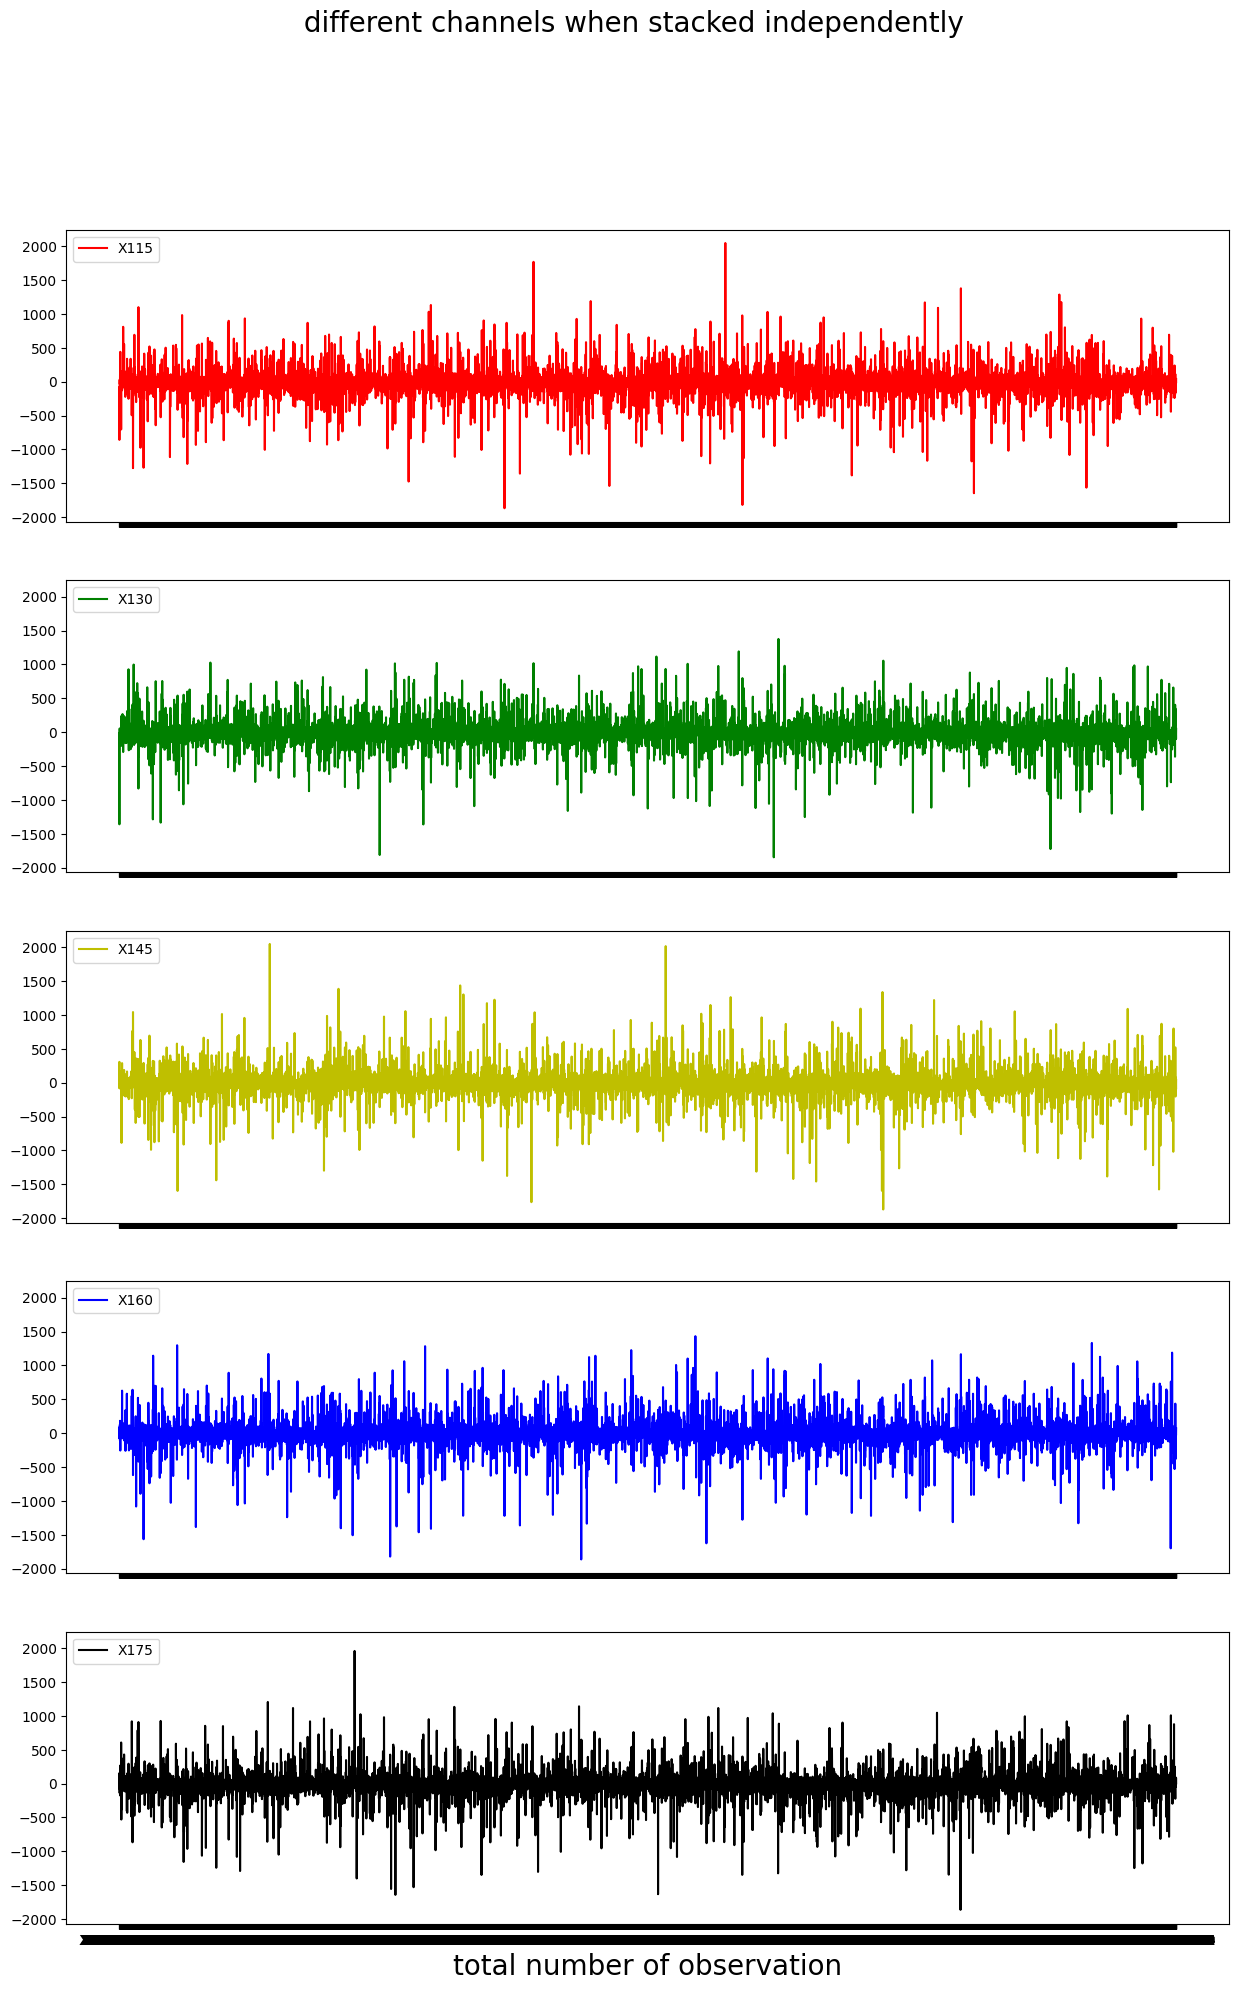

In [ ]:
# plot these features in the same graph with stack plot
#Electroencephalography (EEG) is a method to record an electrogram of the spontaneous
# electrical activity of the brain.
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(15, 22)
labels = ["X115","X130","X145","X160","X175"]
colors = ["r","g","y","b","k"]
fig.suptitle(' different channels when stacked independently', fontsize = 20)
# loop over axes
for i,ax in enumerate(axs):
  axs[i].plot(datas.iloc[:,0],datas[labels[i]],color=colors[i],label=labels[i])
  axs[i].legend(loc="upper left")

plt.xlabel('total number of observation', fontsize = 20)
plt.show()

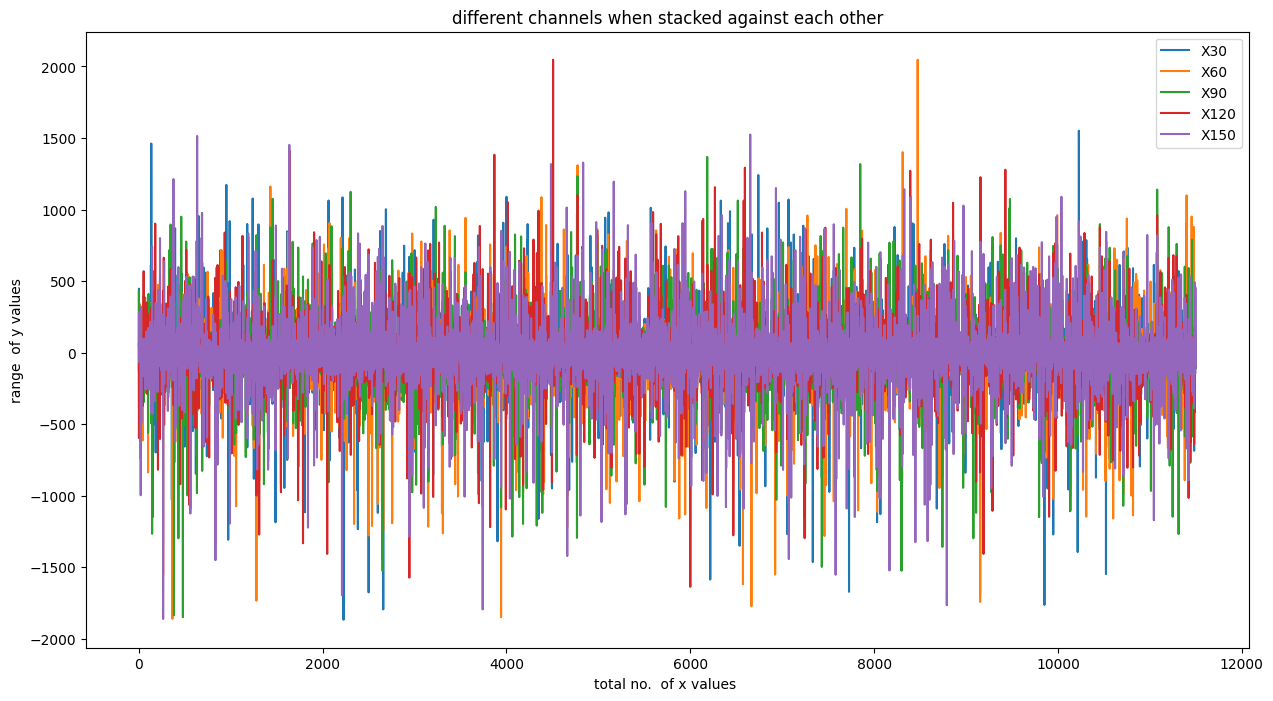

In [ ]:
#waves identification or behaviour of waves 
#all waves in same chart

plt.rcParams['figure.figsize']=(15,8)
datas.loc[:,::30].plot()#take spacific column

plt.title("different channels when stacked against each other")

plt.xlabel("total no.  of x values ")

plt.ylabel("range  of y values")

plt.show()

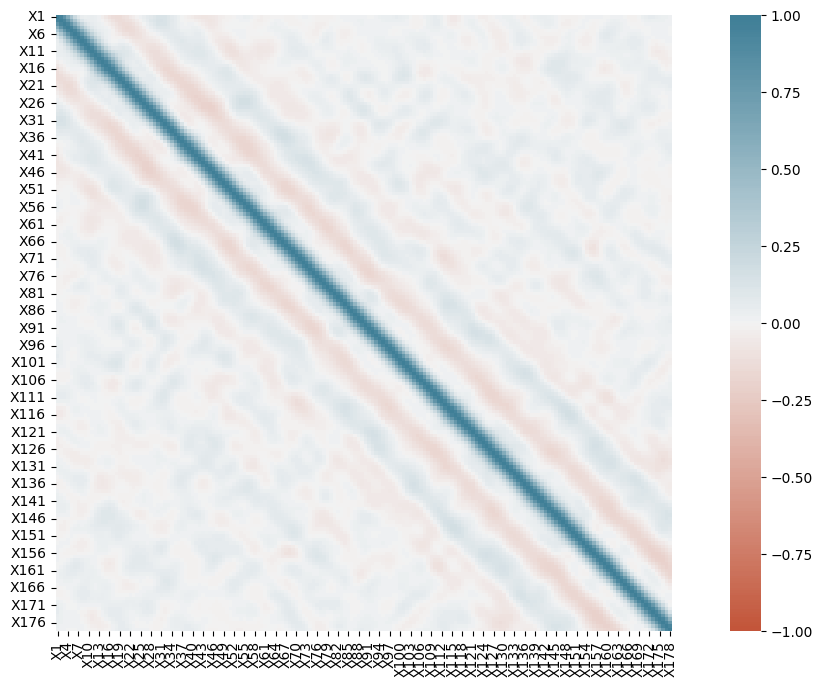

In [ ]:
#finding correlation matrix


corr = data1.corr()
ax= sns.heatmap(corr, vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,225,n=200), square=True)




**SMOTE technique for class immbalance problem solving**

---



In [ ]:
data2 = datas.drop(["Unnamed"],axis=1).copy()


In [ ]:
data2["output"]=data2.y==0

In [ ]:
data2["output"]=data2["output"].astype(int)

In [ ]:
data2.y.value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

In [ ]:
data2['y']=data2['y'].replace([2,3,4,5],0)
data2.y.value_counts()

0    9200
1    2300
Name: y, dtype: int64

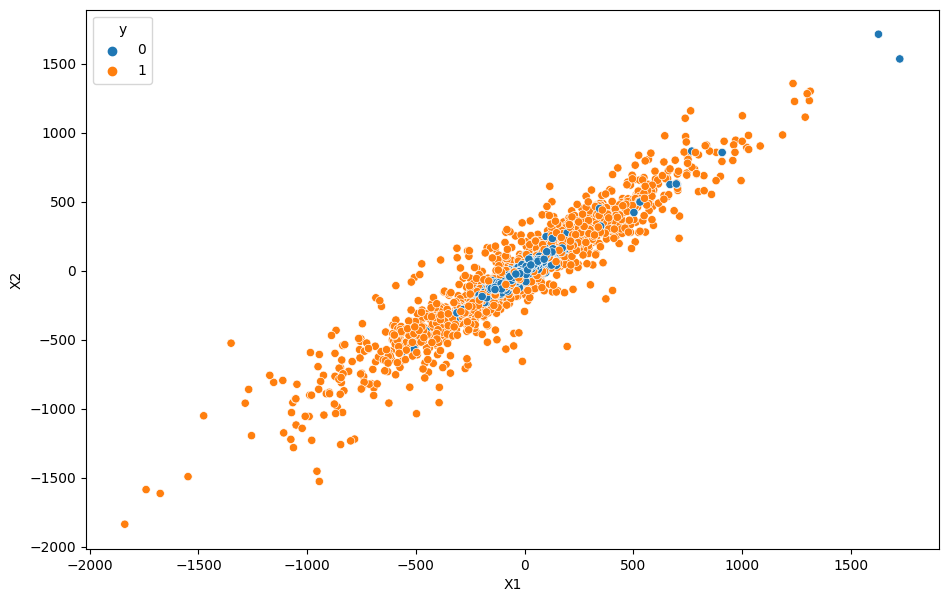

In [ ]:
plt.figure(figsize=(11,7),dpi=100)
sns.despine(left=True)
sns.scatterplot(x='X1',y='X2',hue='y',data=data2)
##In seaborn, the hue parameter determines which column in the 
#data frame should be used for colour encoding.its hue.

plt.show()

In [ ]:
data2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,output
0,135,190,229,223,192,125,55,-9,-33,-38,...,-15,-31,-77,-103,-127,-116,-83,-51,0,0
1,386,382,356,331,320,315,307,272,244,232,...,150,146,152,157,156,154,143,129,1,0
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,64,48,19,-12,-30,-35,-35,-36,0,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-81,-80,-77,-85,-77,-72,-69,-65,0,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,2,-12,-32,-41,-65,-83,-89,-73,0,0


In [ ]:
data2.y.value_counts()



0    9200
1    2300
Name: y, dtype: int64

In [ ]:
x=data2.drop(["output",'y'],axis=1)
y=data2['y']

In [ ]:
counter=Counter(y)
print('before',counter)
smenn=SMOTEENN()
x_train1,y_train1 = smenn.fit_resample(x,y)

before Counter({0: 9200, 1: 2300})


In [ ]:
counter=Counter(y_train1)
print('after',counter)

after Counter({0: 9074, 1: 9038})


**MODEL Building**

In [ ]:
#devided in train and test part

x_train, x_test, y_train, y_test = train_test_split(x_train1,y_train1,test_size=0.5,random_state=42)





In [ ]:
# devided in to validation state

x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)





In [ ]:


scaler=StandardScaler()

#scallling the dataset

x_train = scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

In [ ]:
print(" the training set shape :{}".format(x_train.shape))
print(" the testing set shape :{}".format(x_test.shape))
print(" the validation set shape :{}".format(x_val.shape))

 the training set shape :(9056, 178)
 the testing set shape :(4528, 178)
 the validation set shape :(4528, 178)


**logistic regression**

In [ ]:

#train model on traning dataset
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred =lr.predict(x_val)#prediction on test data

#cmpare actual response value(y_test)with predicted value(y_pred)
print(metrics.accuracy_score(y_val,y_pred))



0.6316254416961131


In [ ]:

#reshape data
y_train_re = y_train.values.reshape(-1,1)
y_val_re = y_val.values.reshape(-1,1)

In [ ]:
#train model on training dataset
lr = LogisticRegression()
lr.fit(x_train, y_train_re)
# STEP 3: make predictions on the testing set
y_pred = lr.predict(x_val)

# compare actual response values (y_test) with predicted response values (y_pred)
print("The accuracy score of the model on the validation data is:{}.".format(metrics.accuracy_score(y_val_re, y_pred)*100))

#fiding out the confusion matrix of the dataset
Mconfusion = metrics.confusion_matrix(y_pred,y_val_re)
print("This is the required confusion matrix of the model:{}.".format(Mconfusion))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score of the model on the validation data is:63.16254416961131.
This is the required confusion matrix of the model:[[1665 1086]
 [ 582 1195]].


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67      2247
           1       0.67      0.52      0.59      2281

    accuracy                           0.63      4528
   macro avg       0.64      0.63      0.63      4528
weighted avg       0.64      0.63      0.63      4528



In [ ]:
# calculate the FPR and TPR for all thresholds of the classification
#fpr= false positive rate
#tpr=true positive rate
y_pred = lr.predict(x_val)
logit_fpr,logit_tpr,thresholds = metrics.roc_curve(y_val,y_pred)

logit_auc=metrics.roc_auc_score(y_val,y_pred)


**KNN**

In [ ]:

knn = KNeighborsClassifier(n_neighbors= 100)
knn.fit(x_train,y_train)
y_valid_pred=knn.predict_proba(x_val)


#evaluation
precision=metrics.accuracy_score(y_pred,y_val)*100
print("accuracy of knn: {0:.2f}%".format(precision))

print(classification_report(y_val,y_pred))




accuracy of knn: 63.16%
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      2247
           1       0.67      0.52      0.59      2281

    accuracy                           0.63      4528
   macro avg       0.64      0.63      0.63      4528
weighted avg       0.64      0.63      0.63      4528



In [ ]:
# calculate the FPR and TPR for all thresholds of the classification
#fpr= false positive rate
#tpr=true positive rate

y_pred = knn.predict(x_val)

knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
knn_auc = metrics.roc_auc_score(y_val, y_pred)

**SVM(Support vector machine)**

In [ ]:
svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(x_train, y_train) 
y_pred = svm.predict(x_val)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_val) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))


# calculate the FPR and TPR for all thresholds of the classification
probs = svm.predict_proba(x_val)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_val, probs)
svm_auc = metrics.roc_auc_score(y_val, probs)


Accuracy with SVM: 65.46%


In [ ]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = svm.predict(x_val)

svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
svm_auc = metrics.roc_auc_score(y_val, y_pred)

**DECISION TREE**

In [ ]:
#accuracy on desicion tree
from sklearn import tree
tree_eeg = tree.DecisionTreeClassifier()
tree=tree_eeg.fit(x_train,y_train)


#prediciton

y_pred = tree.predict(x_val)

#model evaluation

precision = metrics.accuracy_score(y_pred,y_val)*100

print("Accuracy of  decision tree  : {0:.2f}%".format(precision))



Accuracy of  decision tree  : 91.17%


In [ ]:
#calculating fpr and tpr


y_pred = tree.predict(x_val)
tree_fpr,tree_tpr,thresholds = metrics.roc_curve(y_val,y_pred)
tree_auc = metrics.roc_auc_score(y_val,y_pred)

**Random forest classifiers**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth=10,random_state=69)
random.fit(x_train,y_train)

#predicting
y_pred = random.predict(x_val) 
#Evaluating the model
precision = metrics.accuracy_score(y_pred,y_val)* 100

print("Accuracy of the model by using the random algorithm : {0:.2f}%".format(precision))

Accuracy of the model by using the random algorithm : 96.27%


In [ ]:
#calculate fpr and tpr
y_pred = random.predict(x_val)

random_fpr,random_tpr,thresholds=metrics.roc_curve(y_val,y_pred)

random_auc = metrics.roc_auc_score(y_val, y_pred)


**XGBoost**

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

xgbc = XGBClassifier()

xgbc.fit(x_train,y_train)

print("XGBoost")

#prediciting

y_pred =xgbc.predict(x_val)

#model evaluation

precision = metrics.accuracy_score(y_pred,y_val)*100

print("accuracy using XGBoost: {0:.2f}%".format(precision))


XGBoost
accuracy using XGBoost: 98.14%


In [ ]:
#fpr and tpr calculation
y_pred = xgbc.predict(x_val)

xgbc_fpr, xgbc_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
xgbc_auc = metrics.roc_auc_score(y_val, y_pred)

**ROC Curve**

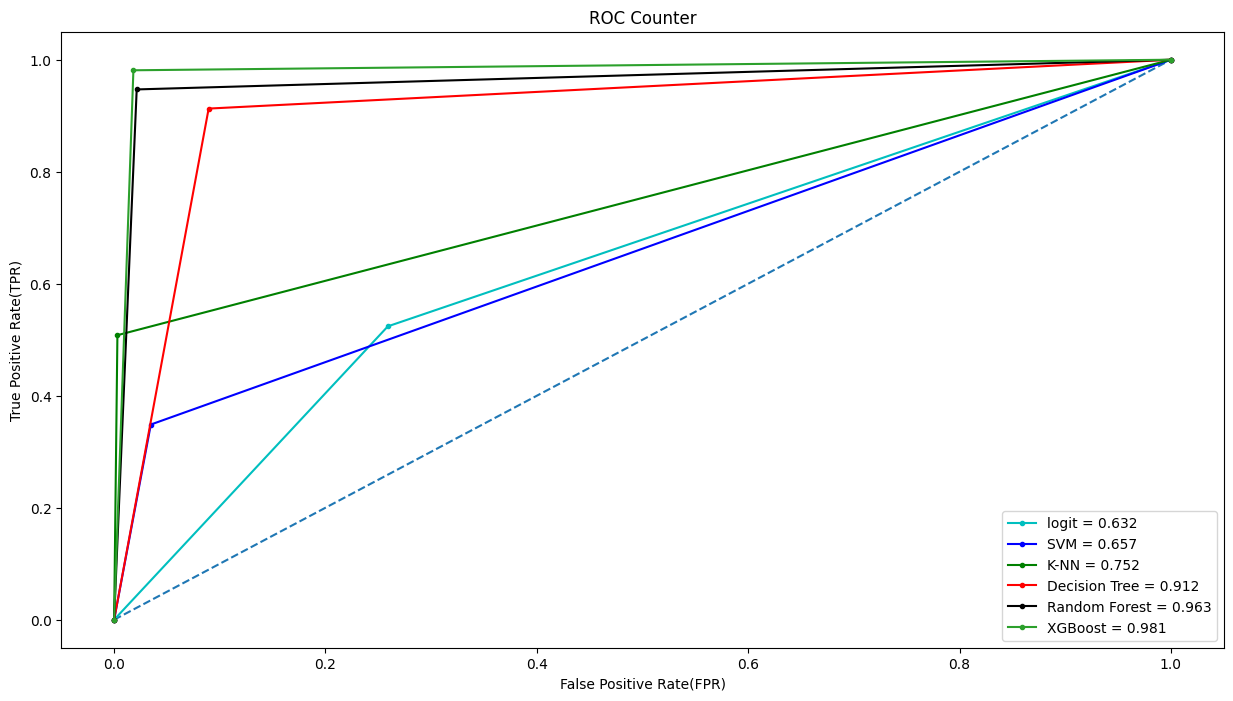

In [ ]:
plt.title("ROC Counter")

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(logit_fpr, logit_tpr, 'c', marker='.', label = 'logit = %0.3f' % logit_auc )

plt.plot(svm_fpr, svm_tpr, 'b', marker='.', label = 'SVM = %0.3f' % svm_auc )

plt.plot(knn_fpr, knn_tpr, 'g', marker='.', label = 'K-NN = %0.3f' % knn_auc)

plt.plot(tree_fpr, tree_tpr, 'r', marker='.',label = 'Decision Tree = %.3f' % tree_auc)

plt.plot(random_fpr, random_tpr, 'k', marker='.',label = 'Random Forest = %.3f' % random_auc)

plt.plot(xgbc_fpr, xgbc_tpr, 'C2', marker='.',label = 'XGBoost = %.3f' % xgbc_auc)

plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate(TPR)')
plt.xlabel('False Positive Rate(FPR)')
plt.show()


**DEEP LEARNING**

In [ ]:
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,LSTM,Dense,Activation,Flatten

from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam

from tensorflow.keras import regularizers


from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

from tensorflow.keras import callbacks




In [ ]:
x_train.shape

(9056, 178)

In [ ]:
early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)



model = Sequential()

#layers

model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=178))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=2,kernel_initializer='uniform',activation='relu'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                5728      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                

In [ ]:
#compile


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [ ]:
#train model


model_train = model.fit(x_train,y_train,batch_size=32,epochs=450,callbacks=[early_stopping],validation_split=0.2)




Epoch 1/450
227/227 [==============================] - 3s 5ms/step - loss: 0.6765 - accuracy: 0.4881 - val_loss: 0.1895 - val_accuracy: 0.3830
Epoch 2/450
227/227 [==============================] - 1s 6ms/step - loss: 0.1826 - accuracy: 0.4010 - val_loss: 0.1501 - val_accuracy: 0.1313
Epoch 3/450
227/227 [==============================] - 1s 6ms/step - loss: 0.1685 - accuracy: 0.4083 - val_loss: 0.1786 - val_accuracy: 0.0933
Epoch 4/450
227/227 [==============================] - 1s 4ms/step - loss: 0.1967 - accuracy: 0.1864 - val_loss: 0.1888 - val_accuracy: 0.1203
Epoch 5/450
227/227 [==============================] - 1s 4ms/step - loss: 0.1576 - accuracy: 0.1158 - val_loss: 0.1614 - val_accuracy: 0.0916
Epoch 6/450
227/227 [==============================] - 1s 4ms/step - loss: 0.1758 - accuracy: 0.0977 - val_loss: 0.1943 - val_accuracy: 0.1098
Epoch 7/450
227/227 [==============================] - 1s 4ms/step - loss: 0.1790 - accuracy: 0.1240 - val_loss: 0.1978 - val_accuracy: 0.4939

In [ ]:
predictions = model.predict(x_val)
pred_labels =np.round(predictions)       
score = accuracy_score(y_val,pred_labels)
conf_mx = confusion_matrix(y_val, pred_labels)


In [ ]:
#

print("XGBoost")
#predicting
y_pred = xgbc.predict(x_test) 

precision = metrics.accuracy_score(y_pred,y_test)* 100

print("Accuracy of the xgboost algo : {0:.2f}%".format(precision))

XGBoost
Accuracy of the xgboost algo : 97.92%
